# Final Project

#### Yingshan Dong
#### LLM used: ChatGPT

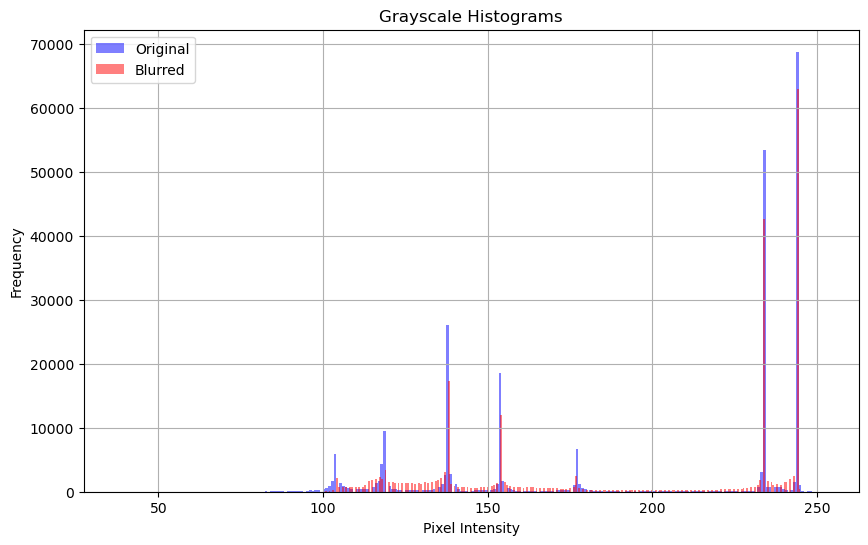


--- Statistical Comparison ---
T-statistic: -0.0815
P-value: 9.3503e-01
Result: No statistically significant difference between the two histograms.

All tasks completed successfully. Images and histogram have been saved.


In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from scipy import stats
import os

# Load the 500x500 grayscale image
image_path = 'tree.png'
img = Image.open(image_path).convert('L')  # Convert to greyscale
img_np = np.array(img)

# Apply Gaussian Blur
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=2))
blurred_np = np.array(blurred_img)

# Plot histograms of original and blurred images
plt.figure(figsize=(10, 6))
plt.hist(img_np.ravel(), bins=256, alpha=0.5, label='Original', color='blue')
plt.hist(blurred_np.ravel(), bins=256, alpha=0.5, label='Blurred', color='red')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Greyscale Histograms')
plt.legend()
plt.grid(True)
plt.savefig('histogram_comparison.png')
plt.show()

# Statistical analysis
# Use a two-sample t-test to compare the two histograms
stat, p_value = stats.ttest_ind(img_np.ravel(), blurred_np.ravel(), equal_var=False)
print("\n--- Statistical Comparison ---")
print(f"T-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")
if p_value < 0.05:
    print("Result: Statistically significant difference between the original and blurred histograms.")
else:
    print("Result: No statistically significant difference between the two histograms.")

# Save the blurred image
blurred_img.save('blurred_image.png')

# Create and save a 250x250 downscaled version
downscaled_img = blurred_img.resize((250, 250))
downscaled_img.save('blurred_downscaled_250x250.png')

# End of Script
print("\nAll tasks completed successfully. Images and histogram have been saved.")